In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
import math

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.dpi'] = 100


### Julia Set Visualization

In [35]:
def julia_iteration(z, c, max_iter=100, escape_radius=2.0):
    for i in range(max_iter):
        if abs(z) > escape_radius:
            return i
        z = z**2 + c
    return max_iter


In [36]:
def compute_julia_set(c, x_min=-2, x_max=2, y_min=-2, y_max=2, 
                      resolution=500, max_iter=100, escape_radius=2.0):
    x = np.linspace(x_min, x_max, resolution)
    y = np.linspace(y_min, y_max, resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    
    grid = np.full(Z.shape, max_iter, dtype=int)  
    z = Z.copy()
    
    escaped = np.abs(z) > escape_radius
    grid[escaped] = 0
    
    for i in range(max_iter):
        mask = grid == max_iter
        z[mask] = z[mask]**2 + c
        
        newly_escaped = (np.abs(z) > escape_radius) & mask
        grid[newly_escaped] = i + 1
    
    return grid, x, y


### Step 1: Implement the map and plot evolution of z


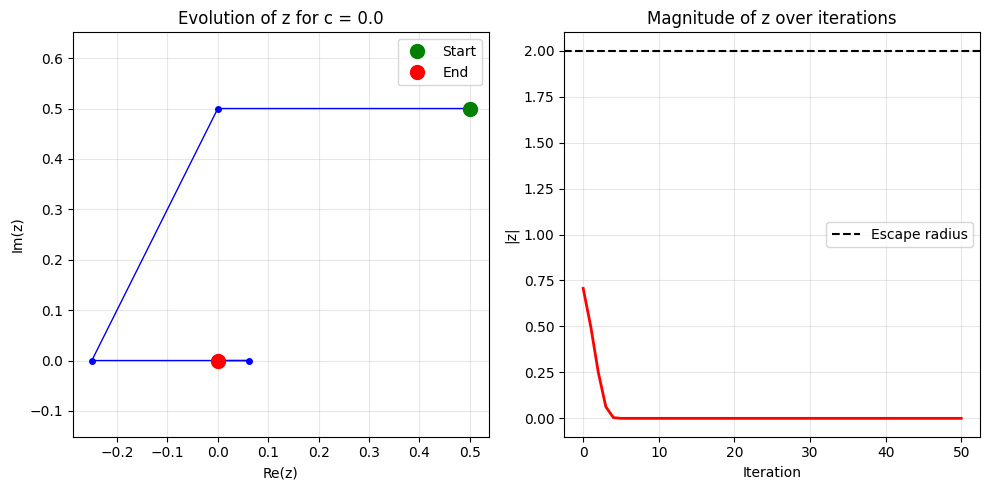

In [37]:
c = 0.0
z0 = 0.5 + 0.5j
max_iter = 50

z_evolution = [z0]
z = z0
for i in range(max_iter):
    z = z**2 + c
    z_evolution.append(z)
    if abs(z) > 2:
        print(f"Diverged at iteration {i+1}")
        break

z_evolution = np.array(z_evolution)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(z_evolution.real, z_evolution.imag, 'b-o', markersize=4, linewidth=1)
plt.plot(z_evolution[0].real, z_evolution[0].imag, 'go', markersize=10, label='Start')
plt.plot(z_evolution[-1].real, z_evolution[-1].imag, 'ro', markersize=10, label='End')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title(f'Evolution of z for c = {c}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.plot(range(len(z_evolution)), np.abs(z_evolution), 'r-', linewidth=2)
plt.axhline(y=2, color='k', linestyle='--', label='Escape radius')
plt.xlabel('Iteration')
plt.ylabel('|z|')
plt.title('Magnitude of z over iterations')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


### Step 2: Play around with different values of c


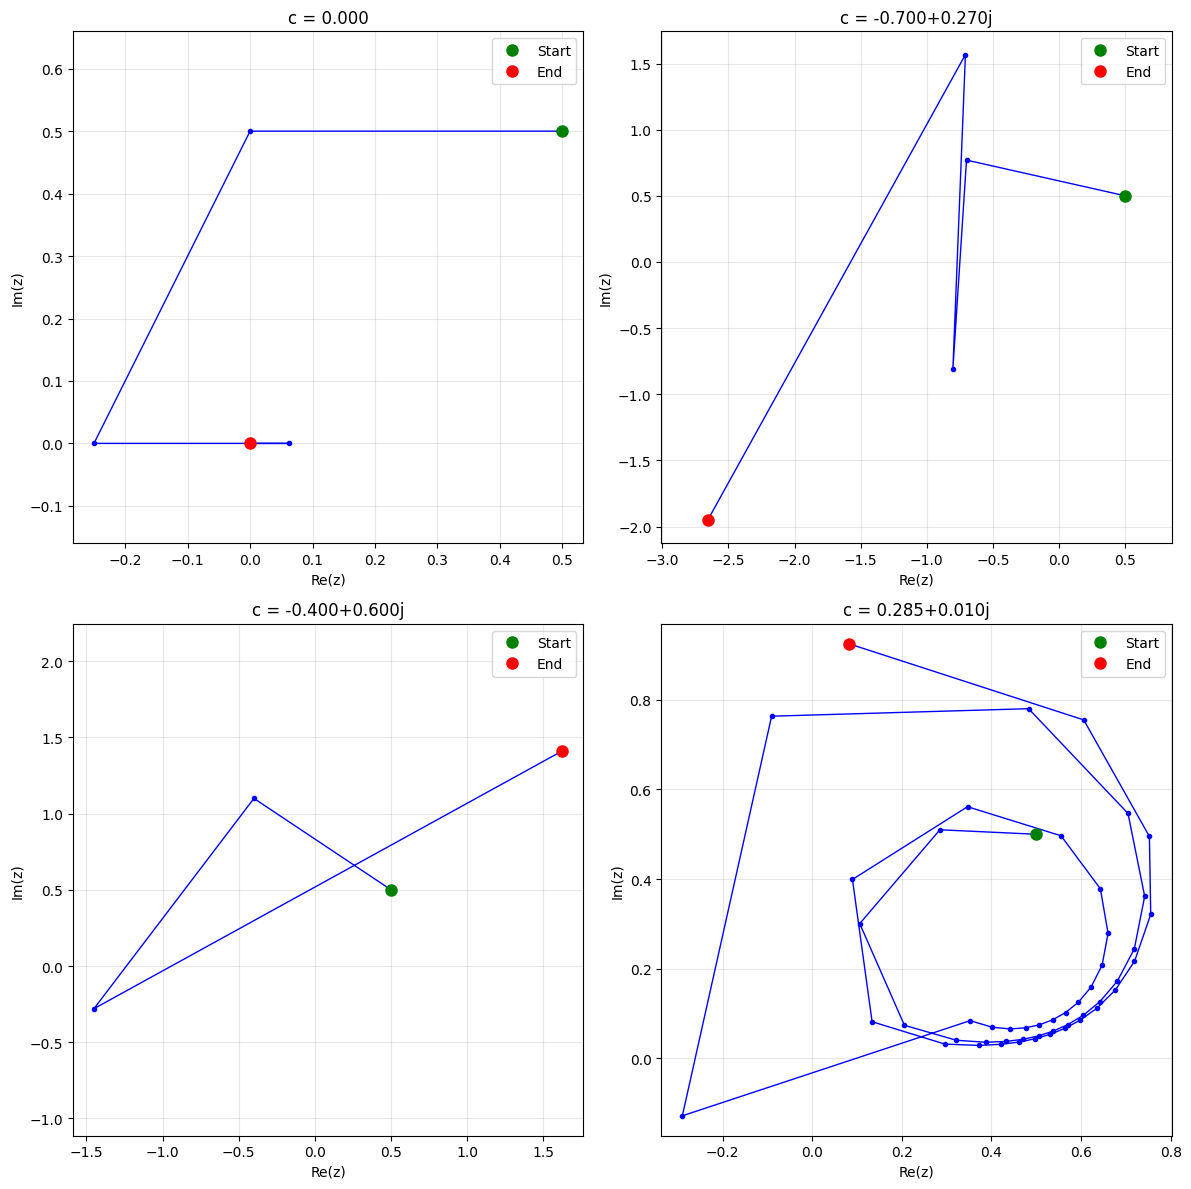

In [38]:
c_values = [0.0, -0.7+0.27j, -0.4+0.6j, 0.285+0.01j]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, c in enumerate(c_values):
    z0 = 0.5 + 0.5j
    z_evolution = [z0]
    z = z0
    for i in range(50):
        z = z**2 + c
        z_evolution.append(z)
        if abs(z) > 2:
            break
    
    z_evolution = np.array(z_evolution)
    axes[idx].plot(z_evolution.real, z_evolution.imag, 'b-o', markersize=3, linewidth=1)
    axes[idx].plot(z_evolution[0].real, z_evolution[0].imag, 'go', markersize=8, label='Start')
    axes[idx].plot(z_evolution[-1].real, z_evolution[-1].imag, 'ro', markersize=8, label='End')
    axes[idx].set_xlabel('Re(z)')
    axes[idx].set_ylabel('Im(z)')
    axes[idx].set_title(f'c = {c:.3f}')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()
    axes[idx].axis('equal')

plt.tight_layout()
plt.show()


### Criterion 1: Two-color plot (black = converges, white = diverges)


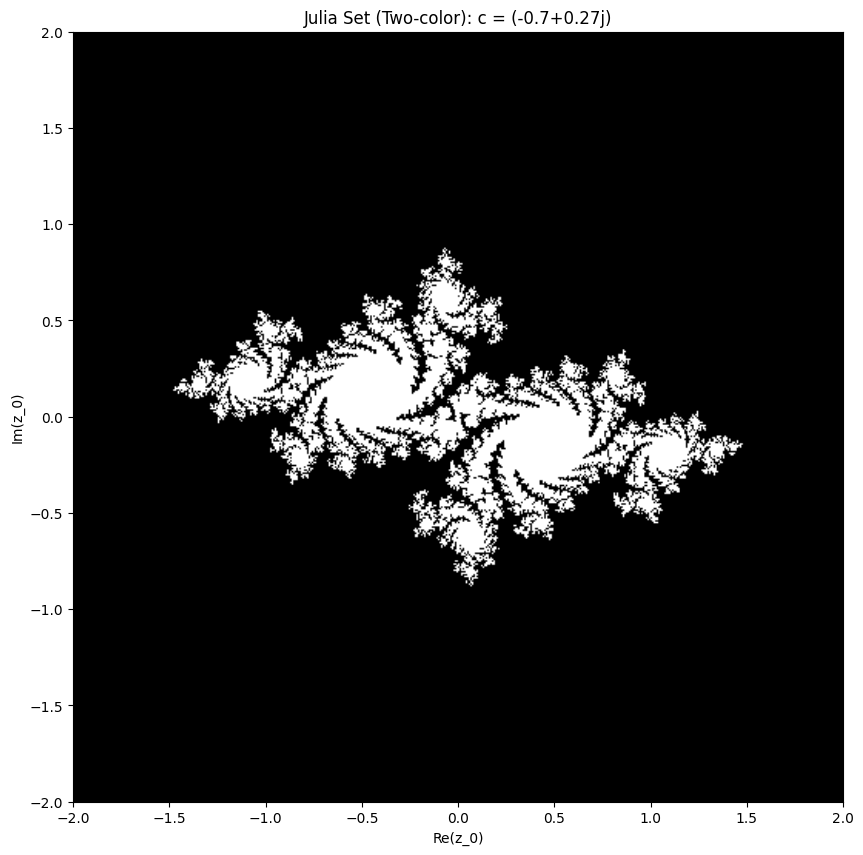

In [39]:
c = -0.7 + 0.27j
grid, x, y = compute_julia_set(c, resolution=500, max_iter=100)

binary_grid = (grid == 100).astype(float)

plt.figure(figsize=(10, 10))
plt.imshow(binary_grid, extent=[x.min(), x.max(), y.min(), y.max()], 
           cmap='gray', origin='lower', interpolation='bilinear')
plt.xlabel('Re(z_0)')
plt.ylabel('Im(z_0)')
plt.title(f'Julia Set (Two-color): c = {c}')
plt.show()


### Criterion 2: Multi-color plot showing iteration counts


/tmp/ipykernel_7426/4271536669.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('hot')


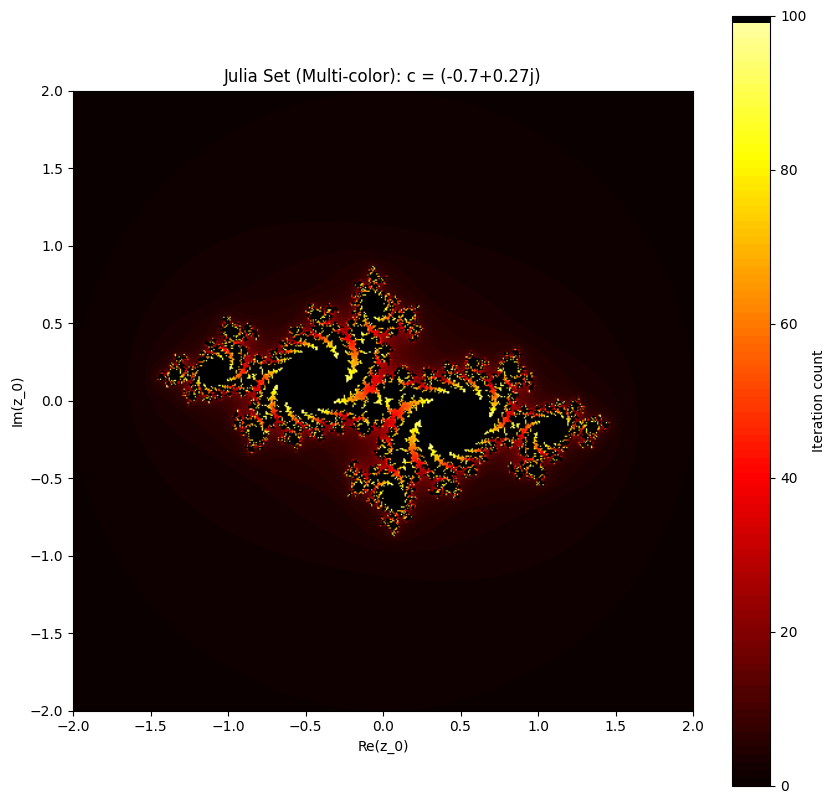

In [40]:
c = -0.7 + 0.27j
grid, x, y = compute_julia_set(c, resolution=500, max_iter=100)

plt.figure(figsize=(10, 10))

cmap = plt.cm.get_cmap('hot')

colors = cmap(np.linspace(0, 0.9, 100))
colors = np.vstack([colors, [[0, 0, 0, 1]]]) 
custom_cmap = ListedColormap(colors)

im = plt.imshow(grid, extent=[x.min(), x.max(), y.min(), y.max()], 
                cmap=custom_cmap, origin='lower', interpolation='bilinear',
                vmin=0, vmax=100)
plt.xlabel('Re(z_0)')
plt.ylabel('Im(z_0)')
plt.title(f'Julia Set (Multi-color): c = {c}')
plt.colorbar(im, label='Iteration count')
plt.show()


### Criterion 3: Julia set for c = 1 - r, where r is the golden ratio


/tmp/ipykernel_7426/2028507056.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('hot')


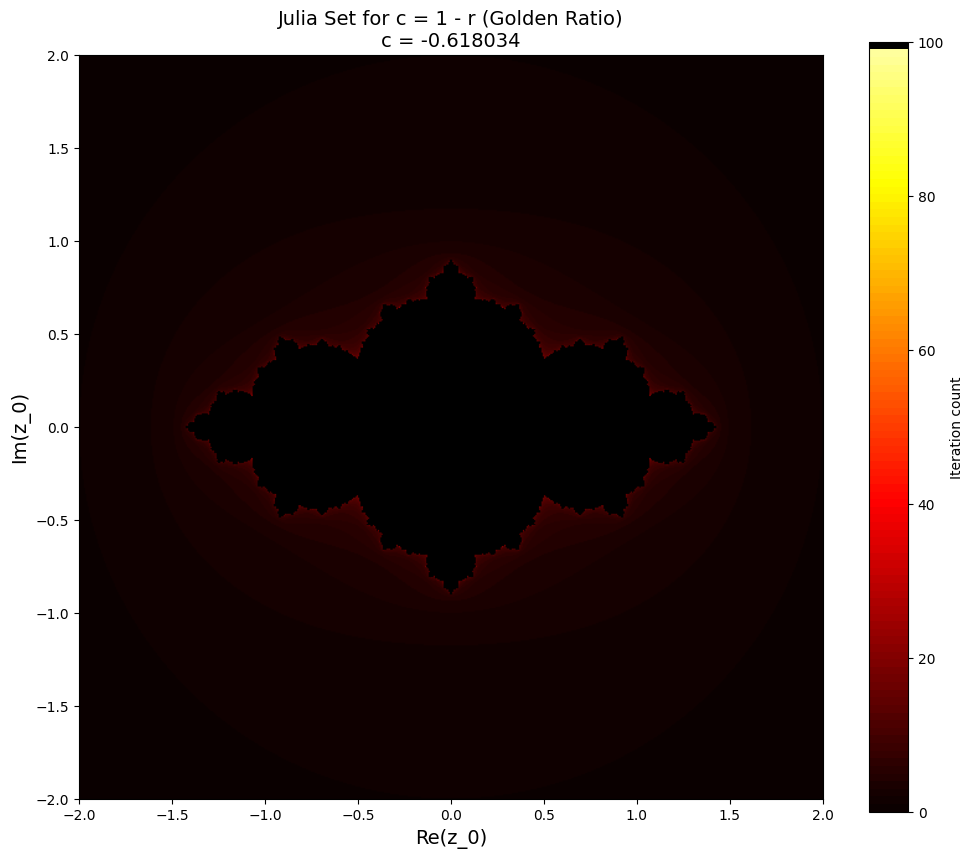

In [41]:
golden_ratio = (1 + np.sqrt(5)) / 2
c_golden = 1 - golden_ratio


grid, x, y = compute_julia_set(c_golden, resolution=600, max_iter=100)

plt.figure(figsize=(12, 10));
cmap = plt.cm.get_cmap('hot')
colors = cmap(np.linspace(0, 0.9, 100))
colors = np.vstack([colors, [[0, 0, 0, 1]]])
custom_cmap = ListedColormap(colors)

im = plt.imshow(grid, extent=[x.min(), x.max(), y.min(), y.max()], 
                cmap=custom_cmap, origin='lower', interpolation='bilinear',
                vmin=0, vmax=100);
plt.xlabel('Re(z_0)', fontsize=14)
plt.ylabel('Im(z_0)', fontsize=14)
plt.title(f'Julia Set for c = 1 - r (Golden Ratio)\nc = {c_golden:.6f}', fontsize=14)
plt.colorbar(im, label='Iteration count')
plt.show();


### Criterion 4: Animation of Julia sets for c = exp(ia), a in [0, 2π]

In [42]:
num_frames = 60
a_values = np.linspace(0, 2*np.pi, num_frames)
c_values_anim = [np.exp(1j * a) for a in a_values]

frames = []
for i, c in enumerate(c_values_anim):
    if i % 10 == 0:
        print(f"Computing frame {i+1}/{num_frames}")
    grid, x, y = compute_julia_set(c, resolution=400, max_iter=100)
    frames.append(grid)

Computing frame 1/60
Computing frame 11/60
Computing frame 21/60
Computing frame 31/60
Computing frame 41/60
Computing frame 51/60


/tmp/ipykernel_7426/323808941.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('hot')


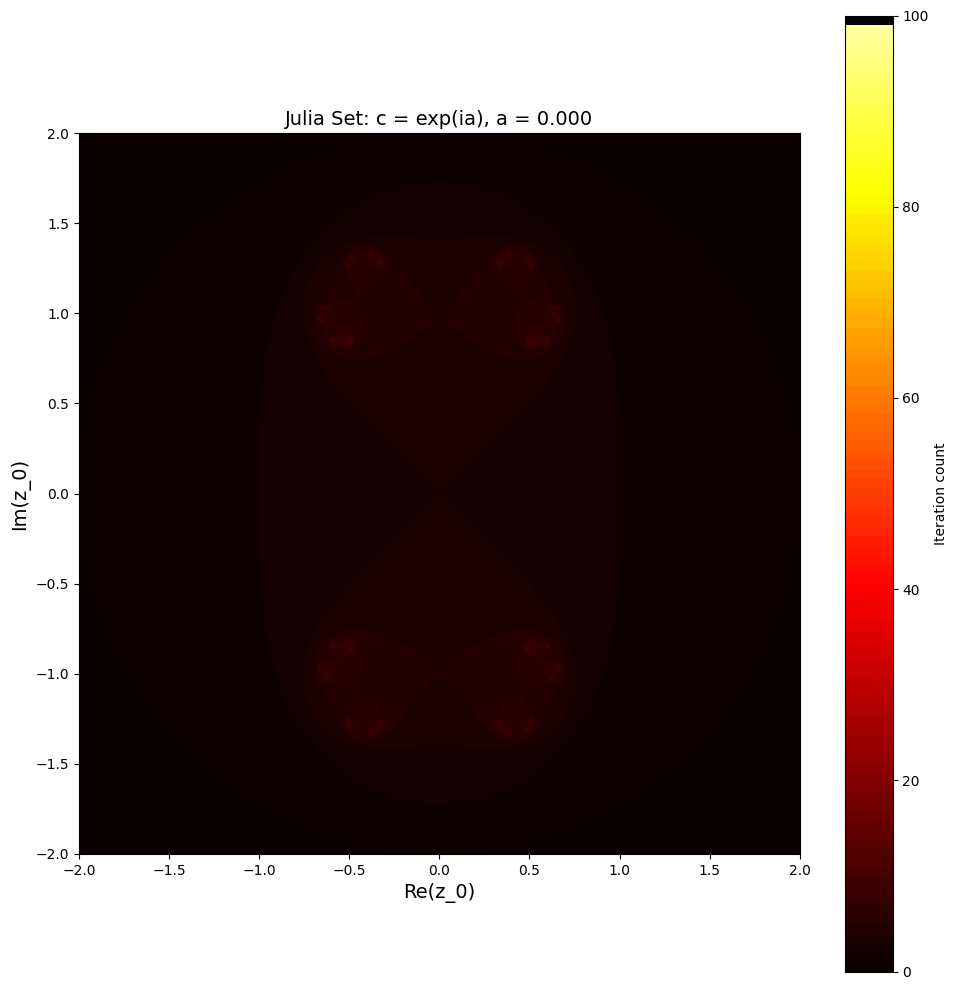

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))

cmap = plt.cm.get_cmap('hot')
colors = cmap(np.linspace(0, 0.9, 100))
colors = np.vstack([colors, [[0, 0, 0, 1]]])
custom_cmap = ListedColormap(colors)

im = ax.imshow(frames[0], extent=[-2, 2, -2, 2], 
               cmap=custom_cmap, origin='lower', interpolation='bilinear',
               vmin=0, vmax=100)
ax.set_xlabel('Re(z_0)', fontsize=14)
ax.set_ylabel('Im(z_0)', fontsize=14)
ax.set_title(f'Julia Set: c = exp(ia), a = {a_values[0]:.3f}', fontsize=14)
plt.colorbar(im, ax=ax, label='Iteration count')

def animate(frame):
    ax.clear()
    im = ax.imshow(frames[frame], extent=[-2, 2, -2, 2], 
                   cmap=custom_cmap, origin='lower', interpolation='bilinear',
                   vmin=0, vmax=100)
    ax.set_xlabel('Re(z_0)', fontsize=14)
    ax.set_ylabel('Im(z_0)', fontsize=14)
    ax.set_title(f'Julia Set: c = exp(ia), a = {a_values[frame]:.3f}', fontsize=14)
    return [im]

anim = FuncAnimation(fig, animate, frames=num_frames, interval=100, blit=True, repeat=True)

plt.tight_layout()
plt.show();


In [44]:
anim.save('julia_animation.gif', writer='pillow', fps=10)


# IT'S BEAUTIFUL. I'VE LOOKED AT THIS FOR FIVE HOURS NOW.

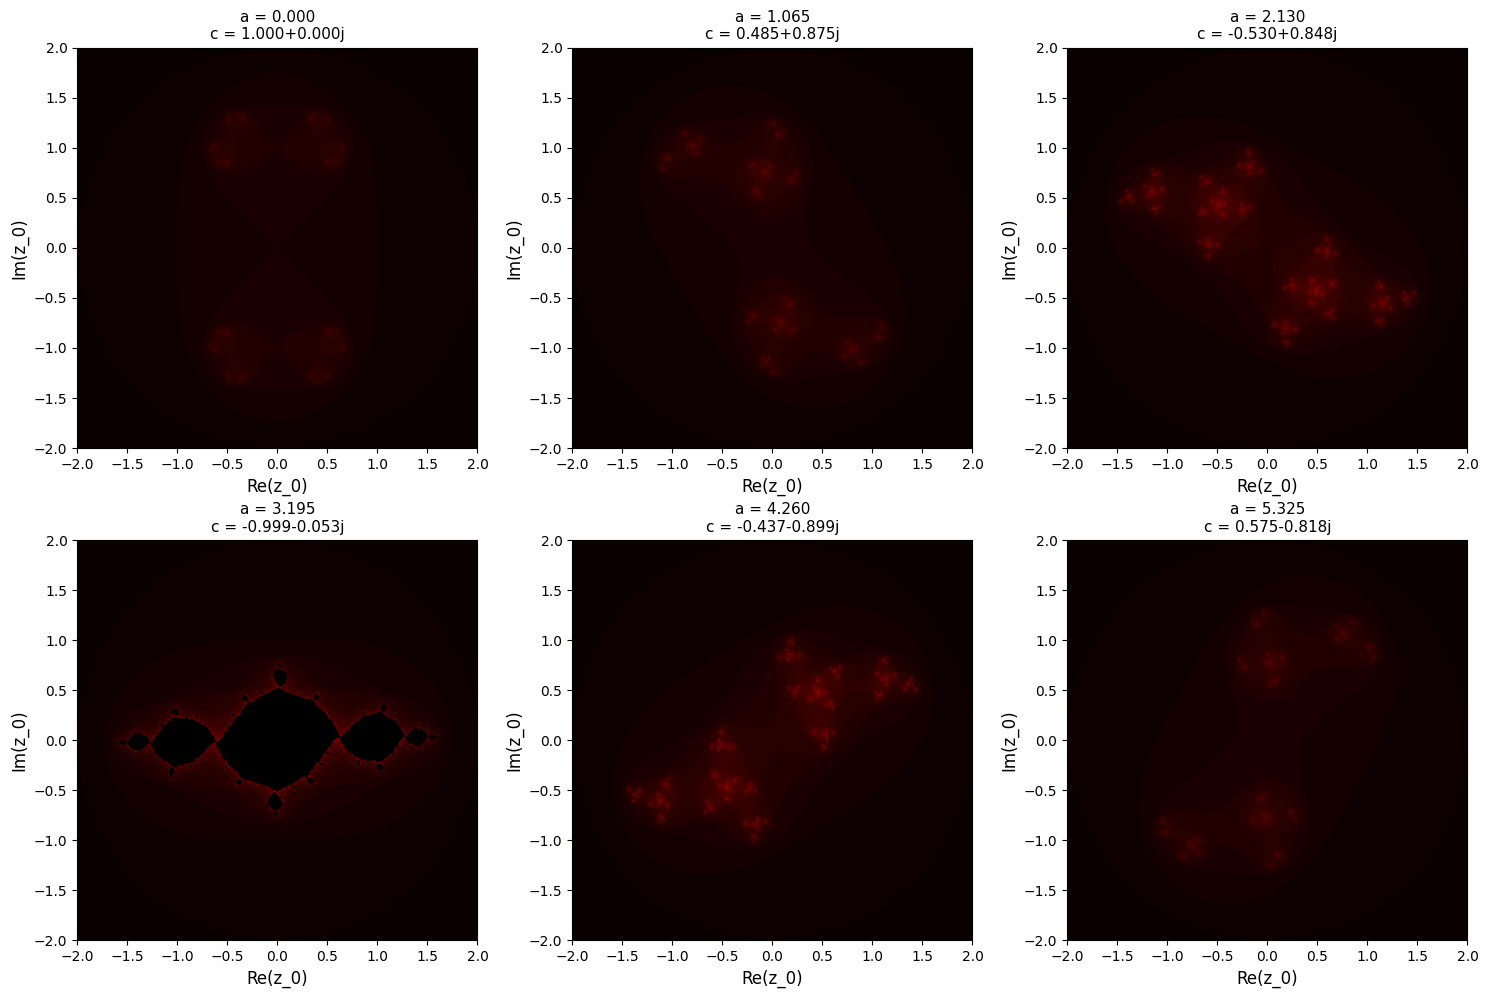

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

frame_indices = [0, 10, 20, 30, 40, 50]
for idx, frame_idx in enumerate(frame_indices):
    a = a_values[frame_idx]
    c = c_values_anim[frame_idx]
    
    im = axes[idx].imshow(frames[frame_idx], extent=[-2, 2, -2, 2], 
                          cmap=custom_cmap, origin='lower', interpolation='bilinear',
                          vmin=0, vmax=100)
    axes[idx].set_xlabel('Re(z_0)', fontsize=12)
    axes[idx].set_ylabel('Im(z_0)', fontsize=12)
    axes[idx].set_title(f'a = {a:.3f}\nc = {c:.3f}', fontsize=11)

plt.tight_layout()
plt.show()
